In [2]:
import tensorflow as tf
import numpy as np
import re
import os

# Function to read and parse the tensor data from a text file
def parse_tensor_from_file(file_path, shape):
    with open(file_path, 'r') as file:
        # Read the content of the file
        tensor_str = file.read()
    components = re.findall(r"([+-]?\d+\.?\d*[eE]?[+-]?\d*(?:\s*[+-]?\d*\.?\d*[eE]?[+-]?\d*j)?)", tensor_str)

    # Convert the components into a numpy array of complex numbers
    complex_numbers = [complex(c.replace(' ','')) for c in components]

    # Convert the list to a NumPy array and reshape it
    numpy_tensor = np.array(complex_numbers, dtype=np.complex128)

    if (shape == 3):
        numpy_tensor = numpy_tensor.reshape(round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)))
    if (shape == 2):
        size = numpy_tensor.size
        new_shape = (round(size ** (1/shape)), round(size ** (1/shape))) if shape == 2 else (size,)
        numpy_tensor = numpy_tensor.reshape(new_shape)
    # Convert NumPy array to TensorFlow tensor
    tf_tensor = tf.convert_to_tensor(numpy_tensor)

    return tf_tensor
def retrieve_dict(base_dir, filename):
    # Dictionary to hold costs organized by prefix (i)
    fidelity_dict = {}
    
    # Iterate through each subfolder in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            # Extract the prefix for identifying the 'i' value
            prefix = folder_name.split('_')[0]
            # Path to the cost.txt file
            cost_file_path = os.path.join(folder_path, filename)
            
            # Read the cost value from the cost.txt file
            if os.path.exists(cost_file_path):
                    # Extract the complex number part using regular expression
                    tensor = parse_tensor_from_file(cost_file_path, 1)
                    # Convert the extracted string to a complex number
                    for t in tensor.numpy():
                         # Get the real part and convert to float
                         float_value = t.real
                         # if (float_value < 10e-4): continue
                         if prefix not in fidelity_dict:
                              fidelity_dict[prefix] = []
                         fidelity_dict[prefix].append(abs(float_value))
    
    return fidelity_dict

{'1': [2.220446049250313e-16, 0.005148491868056548, 0.010351115388876564, 0.015609614771952995, 0.020925829957578745, 0.0263017041382847, 0.03173929205756343, 0.03724076918638275, 0.042808441893696814, 0.048444758745811556, 0.054152323091633314, 0.05993390711730007, 0.0657924675854833, 0.07173116351296094, 0.07775337608641486, 0.08386273117289833, 0.09006312485049839, 0.09635875018193796, 0.10274988102038918, 0.10928663513789427, 0.11586421409978953], '2': [8.881784197001252e-16, 0.01037733178691469, 0.020892211493373503, 0.03155265862690848, 0.042367480273150404, 0.05334638289297655, 0.06450010531913564, 0.07584057807456657, 0.08738111566346929, 0.09913665056677534, 0.11112402054296766, 0.1233623248502298, 0.13587337071418215, 0.14868223962473415, 0.16181801522982975, 0.17531473296066957, 0.1892126398869629, 0.2035598983146324, 0.2184149403264226, 0.23384980546798328, 0.2499550147857197], '3': [4.4297898682543746e-14, 0.026272582673997125, 0.05180962530172306, 0.07657048086085783, 0.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


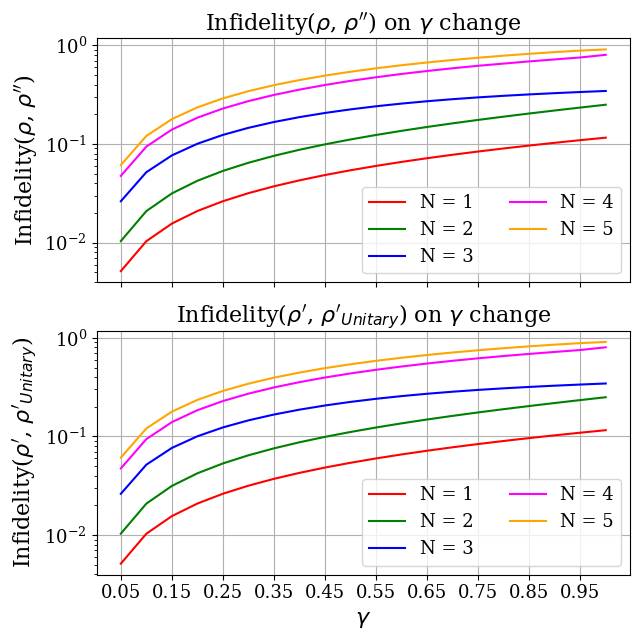

In [3]:
import matplotlib.pyplot as plt


def plot_fidelity(fidelity_dict1, fidelity_dict2, ylabel1, ylabel2, xlabel, file_name):
    # Set font family to serif
    plt.rc('font', family='serif')
    # Create a figure with two subplots stacked vertically
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 6.5), sharex=True)
    colorList = ['r', 'g', 'b', 'magenta', 'orange']
    
    # Plot for the first fidelity dict on the first subplot (top plot)
    for i, (key, values) in enumerate(fidelity_dict1.items()):
        ax1.plot(values[1:], label="N = " + key, color=colorList[i % len(colorList)])  # Use color cycling for variety

    # Adding labels and title to the first plot
    ax1.set_ylabel(ylabel1, fontsize=16)
    ax1.set_title(ylabel1 + ' on ' + xlabel + ' change', fontsize=16)  # Optional: title for the first plot
    ax1.set_yscale('log')  # Set y-axis to logarithmic scale
    ax1.grid(True)
    ax1.legend(fontsize=13, ncol=2)
    
    # Plot for the second fidelity dict on the second subplot (bottom plot)
    for i, (key, values) in enumerate(fidelity_dict2.items()):
        ax2.plot(values[1:], label="N = " + key, color=colorList[i % len(colorList)])

    # Adding labels and title to the second plot
    ax2.set_xlabel(xlabel, fontsize=16)  # Shared x-axis label at the bottom
    ax2.set_ylabel(ylabel2, fontsize=16)
    ax2.set_title(ylabel2 + ' on ' + xlabel + ' change', fontsize=16)  # Optional: title for the second plot
    ax2.set_yscale('log')  # Set y-axis to logarithmic scale
    ax2.grid(True)
    ax2.legend(fontsize=13, ncol=2)

    # Customizing x-axis ticks (you can adjust this based on your data)
    x_ticks = np.arange(0, 20, step=2)  # Adjust step size based on your data
    x_tick_labels = [f'{(tick/20 + 0.05):.2f}' for tick in x_ticks]  # Convert to float and format
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(x_tick_labels)
    ax1.tick_params(axis='y', labelsize=13) 
    ax2.tick_params(axis='y', labelsize=13)
    
    ax1.tick_params(axis='x', labelsize=13)
    ax2.tick_params(axis='x', labelsize=13)
    # Save the figure
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'docs/{file_name}.png', format='png')
    plt.savefig(f'docs/{file_name}.eps', format='eps')

    # Display the plot
    plt.show()

fidelity_dict_rho_rho3 = retrieve_dict('experiment_result_dephasing_2', 'fidelity_rho_rho3.txt')
print(fidelity_dict_rho_rho3)
fidelity_dict_rho2_rho2 = retrieve_dict('experiment_result_dephasing_2', 'fidelity_rho2_rho2.txt')
plot_fidelity(fidelity_dict_rho_rho3, fidelity_dict_rho2_rho2, "Infidelity($\\rho$, $\\rho''$)", "Infidelity($\\rho'$, $\\rho'_{Unitary}$)", '$\\gamma$', 'fidelity_rho-rho3_rho-rho2_2')